In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
from itertools import repeat
from pathlib import Path

from modules.dataset import DATASET_AUGMENTED_DIR, UNIQUE_PLANTS
from modules.preprocess import get_image_data

import numpy as np
import cv2
import matplotlib.pyplot as plt

from PIL import Image

In [45]:
DATASET_RAW: list[tuple[int, Path]] = []

for plant_class in DATASET_AUGMENTED_DIR.iterdir():
    print(plant_class.name)
    index = UNIQUE_PLANTS.index(plant_class.name)
    DATASET_RAW.extend(list(zip(repeat(index), plant_class.glob("*"))))

Arjun Leaf
Curry Leaf
Marsh Pennywort Leaf
Mint Leaf
Neem Leaf
Rubble Leaf


In [46]:
def f(x: tuple[int, Path]):
    return "Curry Leaf Aug (984).jpg" in str(x[1])


selected = list(filter(f, DATASET_RAW))
selected

[(1,
  WindowsPath('D:/.R5-3600-Desktop/Documents/Code/ACLC-Butuan/Other/Herbal-Identification/dataset/New Plant-Dataset/augmented/Curry Leaf/Curry Leaf Aug (984).jpg'))]

In [57]:
path, cl, contour, bbox = get_image_data(*DATASET_RAW[0])

img = np.array(Image.open(path).convert("RGB"))
c = np.array(contour)
img, cl, c, bbox

Preprocessing file New Plant-Dataset\augmented\Arjun Leaf\Arjun Leaf Aug (1).jpg


(array([[[233, 230, 223],
         [233, 230, 223],
         [232, 229, 222],
         ...,
         [254, 255, 249],
         [254, 255, 249],
         [254, 255, 249]],
 
        [[233, 230, 223],
         [233, 230, 223],
         [233, 230, 223],
         ...,
         [254, 255, 249],
         [254, 255, 249],
         [254, 255, 249]],
 
        [[233, 230, 223],
         [234, 231, 224],
         [234, 231, 224],
         ...,
         [254, 255, 249],
         [254, 255, 249],
         [254, 255, 249]],
 
        ...,
 
        [[211, 208, 201],
         [212, 209, 202],
         [214, 211, 204],
         ...,
         [248, 245, 240],
         [248, 245, 240],
         [248, 245, 240]],
 
        [[211, 208, 201],
         [212, 209, 202],
         [214, 211, 204],
         ...,
         [248, 245, 240],
         [248, 245, 240],
         [248, 245, 240]],
 
        [[211, 208, 201],
         [212, 209, 202],
         [214, 211, 204],
         ...,
         [248, 245, 240],
  

In [59]:
img.shape, c.shape

((512, 512, 3), (109, 1, 2))

In [60]:
cv2.boundingRect(c)

(0, 50, 449, 311)

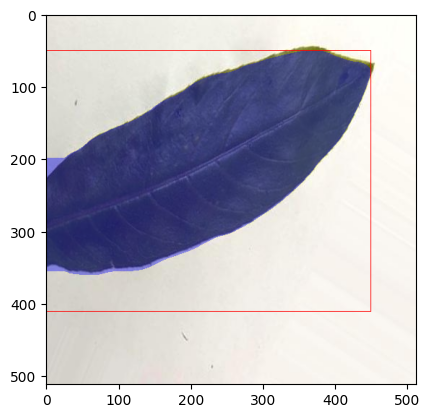

In [61]:
im_copy = img.copy()
im_copy = cv2.drawContours(im_copy, [c], -1, (0, 0, 255), -1)
filled = cv2.addWeighted(img, 0.6, im_copy, 1 - 0.6, 0)
result = cv2.rectangle(filled, (bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]), (255, 0, 0), 1)
plt.imshow(result)